# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

__Introduccion:__


__En la era digital actual, las telecomunicaciones desempeñan un papel fundamental en la interconexión global. Las compañías telefónicas, con su vasta red de usuarios y dispositivos, generan enormes cantidades de datos diariamente. Estos datos son una mina de oro de información valiosa que puede proporcionar un analisis crucial para mejorar la calidad del servicio, optimizar la infraestructura de red y comprender mejor las necesidades y comportamientos de los clientes. El análisis de datos de las telefónicas se ha convertido en un elemento esencial para la toma de decisiones estratégicas, permitiendo a las empresas adaptarse rápidamente a las demandas del mercado, ofrecer experiencias personalizadas y mantenerse competitivas en un entorno empresarial en constante evolución.__

## Inicialización


> **Comentario:** se importan las librerias necerarias para el proyecto.

In [1]:
# Cargar todas las librerías
import os
import platform
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import math
import numpy as np
import datetime

### se agregan un bloque de funciones adicionales que se ncesitara para veriicar los datos

> **Comentario:** se importan algunas funciones para tratar los datos iniciales.

In [2]:
#funciones adicionales

#funcion is_int, que verifica si las columanas que contengan en su nombre la palabra 'id' son del tipo int
def is_int(data):
    try:
        contador = 0
        print("------------------")
        for column in data:
            if 'id' in column.lower():
                print('Nombre de la columna: ', column.lower(), 'es del tipo: ',data[column].dtype)
                if(data[column].dtype != 'int64'):
                    print()
                    print(f"->Modificar el tipo de dato de la columna con el nombre{column.lower()}")
                    contador += 1
        if contador < 1:
            print("------------------")
            print('>No se encontraron columanas a modificar a tipo integer<')
        else:
            print("------------------")
    except Exception as err: 
        print("------------------")
        print(f"Unexpected {err=}, {type(err)=}")
        print("------------------")
        return NameError

    
# cuenta los  duplicados
def duplicados(data):
    numero_duplicados = data.duplicated().sum()
    if (numero_duplicados > 0):
        print()
        print('---Existen ',numero_duplicados,' datos duplicados')
    else:
        print()
        print('---No hay datos duplicados')

#Elimina un caracter de una cadena y lo aplica en una columna      
def elimina_simbolo(columna,format_replace):
    print()
    print("------------------")
    columna = columna.replace(format_replace, regex=True)
    print("-> Se eliminaron todos lo simbolos encontrados")
    print("------------------")
    
    
# Crear un diccionario de mapeo de nombres de meses en inglés a español
#.dt.month_name()
meses_espanol = {
    'January': 'Enero',
    'February': 'Febrero',
    'March': 'Marzo',
    'April': 'Abril',
    'May': 'Mayo',
    'June': 'Junio',
    'July': 'Julio',
    'August': 'Agosto',
    'September': 'Septiembre',
    'October': 'Octubre',
    'November': 'Noviembre',
    'December': 'Diciembre'
}

meses_espanol2 = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

## Cargar datos

> **Comentario:** Carga los distintos data frames.

In [3]:
def cargar_archivos_con_separadores(archivos_con_separadores):
    """
    Carga múltiples archivos CSV con separadores específicos para cada archivo y los almacena en un diccionario de DataFrames.
    
    :param archivos_con_separadores: Diccionario donde las claves son los nombres de los archivos y los valores son los separadores.
    :return: Diccionario con nombres de archivos como claves y DataFrames como valores.
    """
    df = {}  # Objeto que almacenará los DataFrames

    # Iterar sobre los archivos y sus separadores
    for archivo_nombre, separador in archivos_con_separadores.items():
        url_no_windows = '/datasets/' + archivo_nombre
        url_windows = 'datasets/' + archivo_nombre
        
        try:
            # Intentar cargar desde la ruta no-Windows
            if os.path.exists(url_no_windows):
                df[archivo_nombre] = pd.read_csv(url_no_windows, sep=separador, dtype={'votes': 'Int64'})
                print(f"Archivo cargado exitosamente desde '{url_no_windows}'")
            
            # Intentar cargar desde la ruta Windows
            elif os.path.exists(url_windows):
                df[archivo_nombre] = pd.read_csv(url_windows, sep=separador, dtype={'votes': 'Int64'})
                print(f"Archivo cargado exitosamente desde '{url_windows}'")
            
            else:
                raise FileNotFoundError(f"Error: el archivo '{archivo_nombre}' no se encuentra en ninguna de las rutas especificadas.")
        
        except FileNotFoundError as e:
            print(e)
        
        except pd.errors.ParserError as e:
            print(f"Error al procesar el archivo CSV '{archivo_nombre}': {e}")
        
        except Exception as e:
            print(f"Ha ocurrido un error inesperado con el archivo '{archivo_nombre}': {e}")

    return df

# Ejemplo de uso
archivos_con_separadores = {
    'megaline_calls.csv': ',',  
    'megaline_internet.csv': ',',       
    'megaline_messages.csv': ',',       
    'megaline_plans.csv': ',',       
    'megaline_users.csv': ',',       
}

# Cargar los archivos en el objeto df
df = cargar_archivos_con_separadores(archivos_con_separadores)

# El objeto df ahora contiene un DataFrame por cada archivo cargado
df_megaline_calls = df.get('megaline_calls.csv')
df_megaline_internet = df.get('megaline_internet.csv')
df_megaline_messages = df.get('megaline_messages.csv')
df_megaline_plans = df.get('megaline_plans.csv')
df_megaline_users = df.get('megaline_users.csv')



Archivo cargado exitosamente desde 'datasets/megaline_calls.csv'
Archivo cargado exitosamente desde 'datasets/megaline_internet.csv'
Archivo cargado exitosamente desde 'datasets/megaline_messages.csv'
Archivo cargado exitosamente desde 'datasets/megaline_plans.csv'
Archivo cargado exitosamente desde 'datasets/megaline_users.csv'


## Preparar los datos

<!-- [Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.] -->

> **Comentario:** Se verifica los datos de los dataframe:
> 1. Columnas
> 2. Informacion de los tipos de datos
> 3. Total de registros
> 4. Datos ausentes

In [4]:
print('Tabla :megaline_calls')
print(list(df_megaline_calls.columns))
print()
df_megaline_calls.info()
print('----------------------------------------------------------------------')
print('Tabla :megaline_internet')
print(list(df_megaline_internet.columns))
print()
df_megaline_internet.info()
print('----------------------------------------------------------------------')
print('Tabla :megaline_messages')
print(list(df_megaline_messages.columns))
print()
df_megaline_messages.info()
print('----------------------------------------------------------------------')
print('Tabla :df_megaline_plans')
print(list(df_megaline_plans.columns))
print()
df_megaline_plans.info()
print('----------------------------------------------------------------------') 
print('Tabla :df_megaline_users')
print(list(df_megaline_users.columns))
print()
df_megaline_users.info()
print('----------------------------------------------------------------------') 


Tabla :megaline_calls
['id', 'user_id', 'call_date', 'duration']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
----------------------------------------------------------------------
Tabla :megaline_internet
['id', 'user_id', 'session_date', 'mb_used']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64


## Tarifas

> **Comentario:** Se analiza la tabla de tarifas:

In [5]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
#plans
print(list(df_megaline_plans.columns))
print()
df_megaline_plans.info()
duplicados(df_megaline_plans)

['messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes

---No hay datos duplicados


In [6]:
# Imprime una muestra de los datos para las tarifas

display(df_megaline_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<!--[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]-->

En la tabla anterior se denotan los precios y en que consisten los planes tarifarios de la compañia:
 
- No existen problemas  con los datos
- Los nombres de las colunas son correctos
- No existen datos ausentes
- El tipo de dato es correcto


## Corregir datos

<!--[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]-->

> **Comentario:** Verificamos que las columnas id de la tabla planes, sean del tipo integer

In [7]:
#verificar las colummas id sean del tipo integer
is_int(df_megaline_plans)

------------------
------------------
>No se encontraron columanas a modificar a tipo integer<


## Enriquecer los datos

<!--[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]-->

## Usuarios/as

> **Comentario:** Se verifica los datos de los usuarios:
> 1. info() Informacion general
> 2. duplicados() => Existencia de duplicados
> 3. is_int() => Verifica si alguna columna id sea del tipo Integer

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print(list(df_megaline_users.columns))
print()
df_megaline_users.info()
duplicados(df_megaline_users)
is_int(df_megaline_plans)

['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

---No hay datos duplicados
------------------
------------------
>No se encontraron columanas a modificar a tipo integer<


> **Comentario:** Tomamos una muestra al azar de los usuario:

In [9]:
# Imprime una muestra de datos para usuarios
df_megaline_users.sample(10, random_state = 8)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
370,1370,Nenita,Vasquez,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-09-12,ultimate,NaN
56,1056,Denis,Chandler,33,"Cincinnati, OH-KY-IN MSA",2018-03-01,surf,NaN
149,1149,Jamaal,Camacho,54,"San Francisco-Oakland-Berkeley, CA MSA",2018-03-03,surf,NaN
247,1247,Marion,Singleton,75,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-04-12,ultimate,NaN
97,1097,Deandre,Powell,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-26,surf,NaN
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
64,1064,Gerardo,Ashley,46,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-03,surf,NaN
364,1364,Clarine,Bonner,75,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-08-09,surf,NaN
373,1373,Lindsey,Dickerson,21,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-30,ultimate,NaN


<!--[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]-->

*___En el dataframe user podemos encontrar algunos datos generales de los usuarios, como lo son:
nombre,edad, ciudad, fecha de registro, el tipo de plan que tienen con la compañia.___

*___Es necesario separar en dos columnas la columna city___

*___El contenido de los datos en  general esta bien, aunque podriamos sustituir los valores ausentes ('NaN') de la columna 'churn_date' por un valor numerico como 0___


> **Comentario:** Se verifica la existencia de datos ausentes del dataframe usuarios:

In [10]:
print(df_megaline_users.isna().sum() )

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


### Corregir los datos

<!--[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]-->
> **Comentario:** Se rellena valores ausentes por el valor 0 de la tabla usuarios.

In [11]:
df_megaline_users.fillna(0, inplace=True)
print(df_megaline_users.isna().sum() )

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64


### Enriquecer los datos

___Se puden tener separados los datos de la columa 'city', ya que contiene tambien datos de ciudades y estados en la misma columna___

## Llamadas

> **Comentario:** Se verifica los datos de las llamadas realizadas de los usuarios:
> 1. info() Informacion general
> 2. duplicados() => Existencia de duplicados
> 3. is_int() => Verifica si alguna columna id sea del tipo Integer

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(list(df_megaline_calls.columns))
print()
df_megaline_calls.info()
duplicados(df_megaline_calls)
is_int(df_megaline_calls)

['id', 'user_id', 'call_date', 'duration']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

---No hay datos duplicados
------------------
Nombre de la columna:  id es del tipo:  object

->Modificar el tipo de dato de la columna con el nombreid
Nombre de la columna:  user_id es del tipo:  int64
------------------


In [13]:
# Imprime una muestra de datos para las llamadas
df_megaline_calls.sample(10, random_state = 8)

,id,user_id,call_date,duration
26902,1101_229,1101,2018-11-26,2.31
108699,1384_6,1384,2018-11-09,15.46
101032,1361_134,1361,2018-12-08,5.39
94134,1335_364,1335,2018-11-22,8.34
52800,1189_286,1189,2018-11-30,7.03
107774,1382_597,1382,2018-07-24,0.00
44094,1160_110,1160,2018-09-11,7.71
96439,1343_125,1343,2018-11-02,8.76
94506,1336_377,1336,2018-11-16,3.22
53239,1191_387,1191,2018-10-18,4.68


<!--[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]-->

___El data frame calls esta se muestra la informacion de los usuarios, sobre la fecha de la llamda y la duracion,
en el data no se encuentran datos duplicados, se recomienda cambiar el tipo de dato de la columna user_id del tipo object a tipo integer, de igual manera los valores de la columna id contienden un simbolo no numerico que deberia de suprimirse, por ultimo cambiar el tipo de datos de la columna 'call_date' de tipo objeto a tipo datetime.___

### Corregir los datos

<!--[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]-->

> **Comentario:** Se corrigen los datos de las llamadas de los usuarios:
> 1. convierte los datos string a integer en la columa 'id'
> 2. is_int() verifica que las columnas id del dataframe llamadas sea del tipo integer
> 3. Convirte los datos de la columna 'call_date' del tipo string al tipo fecha

In [14]:
display(df_megaline_calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [15]:
df_megaline_calls['id'] = df_megaline_calls['id'].astype(str).astype(int)
is_int(df_megaline_calls)
df_megaline_calls["call_date"] = pd.to_datetime(df_megaline_calls['call_date'], errors='coerce')


------------------
Nombre de la columna:  id es del tipo:  int32

->Modificar el tipo de dato de la columna con el nombreid
Nombre de la columna:  user_id es del tipo:  int64
------------------


### Enriquecer los datos

<!--[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]-->

___Podria incluirse una columna de los numeros telefonicos, una columna con el nombre de la compañia a quien el usuario realiza la llamada, para posteriormete ofrecer algun tarifa especial a los usuarios que hagan llamadas a la misma compañia, seria buena idea agregar una columna con el timestamp de la llamada, para poder realizar un analisis de en que momento se utiliza mas o en su defecto, el momento en que menos se utilzan las llamadas telefonicas.___

## Mensajes

> **Comentario:** Se verifica los datos de los mensajes realizados de los usuarios:
> 1. info() Informacion general
> 2. duplicados() => Existencia de duplicados
> 3. is_int() => Verifica si alguna columna id sea del tipo Integer

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print(list(df_megaline_messages.columns))
print()
df_megaline_messages.info()
duplicados(df_megaline_messages)
is_int(df_megaline_messages)

['id', 'user_id', 'message_date']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

---No hay datos duplicados
------------------
Nombre de la columna:  id es del tipo:  object

->Modificar el tipo de dato de la columna con el nombreid
Nombre de la columna:  user_id es del tipo:  int64
------------------


In [17]:
# Imprime una muestra de datos para los mensajes

df_megaline_messages.sample(10, random_state = 8)

,id,user_id,message_date
62221,1391_226,1391,2018-10-04
61560,1385_24,1385,2018-05-02
49639,1328_597,1328,2018-10-23
12257,1080_260,1080,2018-10-31
28109,1173_209,1173,2018-10-22
22617,1133_918,1133,2018-11-16
63895,1408_20,1408,2018-10-18
73099,1470_727,1470,2018-11-01
9197,1067_47,1067,2018-10-18
36493,1242_165,1242,2018-12-03


<!--[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]-->
___El data frame messages contiene la fecha y el user_id de cuando un usuario mando un mensaje, se observa que los valores de la columna id contienden un simbolo no numerico que deberia de suprimirse, por ultimo cambiar el tipo de datos de la columna 'message_date' de tipo objeto a tipo datetime.___

### Corregir los datos

<!-- [Corrige los problemas obvios con los datos basándote en las observaciones iniciales.] -->
> **Comentario:** Se corrigen los datos de los mensajes de los usuarios:
> 1. convierte los datos string a integer en la columa 'id'
> 2. is_int() verifica que las columnas id del dataframe mensajes sea del tipo integer
> 3. Convirte los datos de la columna 'message_date' del tipo string al tipo fecha

In [18]:
df_megaline_messages['id'] = df_megaline_messages['id'].astype(str).astype(int)
is_int(df_megaline_messages)
df_megaline_messages["message_date"] = pd.to_datetime(df_megaline_messages['message_date'], errors='coerce')

------------------
Nombre de la columna:  id es del tipo:  int32

->Modificar el tipo de dato de la columna con el nombreid
Nombre de la columna:  user_id es del tipo:  int64
------------------


### Enriquecer los datos

<!--[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]-->
___Adicionalmente podria incluirse unas columnas donde se pueda apreciar a que numeros y sus respectivas compañias telefonicas les fueron enviados mensajes, para posteriormete realizar algun analizis que nor permita ver la interacción del usuario con los remitentes, al igual de una columa con algun timestamp con lo cual podamos obserar en que momento se realizan mas el envio de mensajes o en su defecto, cuando no es utilizado el servicio de mensajes.___

## Internet

> **Comentario:** Se verifica los datos de los megas usados de los usuarios:
> 1. info() Informacion general
> 2. duplicados() => Existencia de duplicados
> 3. is_int() => Verifica si alguna columna id sea del tipo Integer

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(list(df_megaline_internet.columns))
print()
df_megaline_internet.info()
duplicados(df_megaline_internet)
is_int(df_megaline_internet)


['id', 'user_id', 'session_date', 'mb_used']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

---No hay datos duplicados
------------------
Nombre de la columna:  id es del tipo:  object

->Modificar el tipo de dato de la columna con el nombreid
Nombre de la columna:  user_id es del tipo:  int64
------------------


In [20]:
# Imprime una muestra de datos para el tráfico de internet

df_megaline_internet.sample(10, random_state = 8)

,id,user_id,session_date,mb_used
50949,1228_44,1228,2018-10-23,79.38
60889,1277_192,1277,2018-05-14,352.74
78598,1367_90,1367,2018-11-19,487.94
2750,1013_128,1013,2018-12-07,408.53
57431,1258_585,1258,2018-07-23,0.00
27038,1126_28,1126,2018-08-09,714.99
56812,1257_79,1257,2018-11-22,448.24
39189,1176_10,1176,2018-12-05,143.27
25873,1120_456,1120,2018-09-05,0.00
67383,1313_57,1313,2018-12-03,503.21


<!-- [Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] -->

___En el data frame internet se muestra los megabytes usados y la fecha de consumo del usuario,
se aprecia que los titulos de la columnas tienen buen formato de nombre, al igual que el contenido de los datos, a excepción de los valores de la columna 'id' que poseen un simbolo incorrecto al formato esperado, se recomienda suprimir dicho simbolo,
no se encuentran datos duplicados, se recomienda cambiar el tipo de formato de datos de la columna 'id' del tipo objeto al tipo intenger, por ultimo cambiar el tipo de datos de la columna 'session_date' de tipo objeto a tipo datetime.___

### Corregir los datos

<!-- [Corrige los problemas obvios con los datos basándote en las observaciones iniciales.] -->
> **Comentario:** Se corrigen los datos del data frame internet de los usuarios:
> 1. convierte los datos string a integer en la columa 'id'
> 2. is_int() verifica que las columnas id del dataframe internet sea del tipo integer
> 3. Convirte los datos de la columna 'session_date' del tipo string al tipo fecha

In [21]:
df_megaline_internet['id'] = df_megaline_internet['id'].astype(str).astype(int)
is_int(df_megaline_internet)
df_megaline_internet["session_date"] = pd.to_datetime(df_megaline_internet['session_date'], errors='coerce')


------------------
Nombre de la columna:  id es del tipo:  int32

->Modificar el tipo de dato de la columna con el nombreid
Nombre de la columna:  user_id es del tipo:  int64
------------------


### Enriquecer los datos

<!--[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]-->

___Esta tabla podria ser crucial, dado que el uso de 'internet' para todo tipo de cosas, streaming, llamadas, video llamadas, mensajeria, redes sociales, muscia, video, etc., se podrian incluir mas columnas que nos indiquen en que se esta consumiento ese internet, en que horario y en que aplicacion, por ejemplo: un navegador, uber, didi, Airbnb, aerolineas, app de comida, app de trasporte,app de mapa, app de oscio, app de bancos, compartir internet con otros dispositivos, etc. para poder ofercerle un mejor paquete de datos (internet) al usuario, en adicion con una colulmna de ubicacion gps del telefono del usuario o una triangulacion de las antenas de la telefonica, a las que esté conectado la señal celular en ese momento, de esta manera podriamos saber en que ubicacion geografica se esta consumiento el internet y si el usuario esta desplazandose o no, y si se desplaza, a que velocidad lo hace. De igual manera, obtener un timestamp del momento en que se uso ese internet.___

## Estudiar las condiciones de las tarifas

<!--[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]-->

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

display(df_megaline_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

<!--[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]-->

> **Comentario:** Se calcula el numero de llamadas por mes, hecha por los usuarios.
> 1. se crea una columa llamada mes y se llena con el mes de la fecha de la colluma 'call_date' en el data frame llamadas
> 2. se realiza una agrupacion por ['user_id','mes']  del data frame llamadas, obtenemos la sumatoria de la duracion de la agrupacion.
> 3.mostramos la tabla resultante.


In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_megaline_calls["mes"] = df_megaline_calls["call_date"].dt.month
llamadas_por_mes = df_megaline_calls.groupby(['user_id','mes'])['duration'].count().reset_index(name='llamadas_por_mes')
display(llamadas_por_mes.head(10))

,user_id,mes,llamadas_por_mes
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


> **Comentario:** Se calcula el numero de minutos por mes, realizados por los usuarios.
> 1. se crea una columa llamada mes y se llena con el mes de la fecha de la colluma 'call_date' en el data frame mensajes
> 2. se realiza una agrupacion por ['user_id','mes']  del data frame llamadas, obtenemos la sumatoria de la frecuencia de la agrupacion.
> 3.mostramos la tabla resultante.

In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_megaline_calls["mes"] = df_megaline_calls["call_date"].dt.month
minutos_por_mes = df_megaline_calls.groupby(['user_id','mes'])['duration']\
                    .sum()\
                    .reset_index(name='minutos_por_mes')


display(minutos_por_mes.head(10))

,user_id,mes,minutos_por_mes
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
5,1001,12,392.93
6,1002,10,54.13
7,1002,11,359.76
8,1002,12,363.24
9,1003,12,1041.00


> **Comentario:** Se calcula el numero de mensajes por mes, realizados por los usuarios.
> 1. se crea una columa llamada mes y se llena con el mes de la fecha de la colluma 'message_date' en el data frame mensajes
> 2. se realiza una agrupacion por ['user_id','mes']  del data frame mensajes, obtenemos la sumatoria de la frecuencia de la agrupacion.
> 3.mostramos la tabla resultante.

In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_megaline_messages["mes"] = df_megaline_messages["message_date"].dt.month
mensajes_por_mes = df_megaline_messages.groupby(['user_id','mes'])['mes']\
                    .count()\
                    .reset_index(name='mensajes_por_mes')

display(mensajes_por_mes.head(10))

,user_id,mes,mensajes_por_mes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


> **Comentario:** Se calcula el numero de megas por mes, realizados por los usuarios.
> 1. se crea una columa llamada mes y se llena con el mes de la fecha de la colluma 'session_date' en el data frame internet
> 2. se realiza una agrupacion por ['user_id','mes']  del data frame internet, obtenemos la sumatoria de la frecuencia de la agrupacion.
> 3.mostramos la tabla resultante.

In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

df_megaline_internet["mes"] = df_megaline_internet["session_date"].dt.month
internet_por_mes = df_megaline_internet.groupby(['user_id','mes'])['mb_used']\
                    .sum()\
                    .reset_index(name='internet_por_mes')

display(internet_por_mes.head(10))

,user_id,mes,internet_por_mes
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
5,1001,12,19369.18
6,1002,10,6552.01
7,1002,11,19345.08
8,1002,12,14396.24
9,1003,12,27044.14


<!--[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]-->

> **Comentario:** Se fusionan los datos de llamadas, minutos, mensajes e Internet anterioremte calculados con base en user_id y month.

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

#merge_data = llamadas_por_mes.merge(minutos_por_mes,how='inner',left_on = ['user_id','mes'],right_on =['user_id','mes'])\
#                            .merge(mensajes_por_mes,how='inner',left_on = ['user_id','mes'],right_on =['user_id','mes'])\
#                            .merge(internet_por_mes,how='inner',left_on = ['user_id','mes'],right_on =['user_id','mes'])\
                
            
#display(merge_data.head(10))

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

merge_data = llamadas_por_mes.merge(minutos_por_mes,how='outer',left_on = ['user_id','mes'],right_on =['user_id','mes'])\
                            .merge(mensajes_por_mes,how='outer',left_on = ['user_id','mes'],right_on =['user_id','mes'])\
                           .merge(internet_por_mes,how='outer',left_on = ['user_id','mes'],right_on =['user_id','mes'])\
                
            
display(merge_data.head(10))

,user_id,mes,llamadas_por_mes,minutos_por_mes,mensajes_por_mes,internet_por_mes
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
5,1001,12,56.0,392.93,44.0,19369.18
6,1002,10,11.0,54.13,15.0,6552.01
7,1002,11,55.0,359.76,32.0,19345.08
8,1002,12,47.0,363.24,41.0,14396.24
9,1003,12,149.0,1041.00,50.0,27044.14


> **Comentario:** al conjunto de datos creados anteriormente, se se adjunta los valores de las tarifas de los planes.
> 1. En un primer paso sehace una fusion de la tabla usuario y la de tarifas para obtener los tipos de tarifas por usuario
> 2. UNa ves obtenidos los datos de los planes/usuario se fusionan con los datos anterioremte calculados de telefono,minutos,mensajes e internet, apartir de la columa de if_usuario.

In [29]:
# Añade la información de la tarifa
 
# tarifa_data =  usuarios merge plan tarifario
tarifa_data = df_megaline_users.merge(df_megaline_plans,how='left' , left_on='plan', right_on='plan_name')
tarifa_data.sort_values("user_id", ascending=True)

# all_data = tarifa_data merge merge_data
all_data = tarifa_data.merge(merge_data,how='left',left_on='user_id', right_on='user_id')
display(all_data.head(7))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,mes,llamadas_por_mes,minutos_por_mes,mensajes_por_mes,internet_por_mes
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,1000,30720,...,70,7,0.01,0.01,ultimate,12.0,16.0,116.83,11.0,1901.47
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,20,10,0.03,0.03,surf,8.0,27.0,171.14,30.0,6919.15
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,20,10,0.03,0.03,surf,9.0,49.0,297.69,44.0,13314.82
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,20,10,0.03,0.03,surf,10.0,65.0,374.11,53.0,22330.49
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,20,10,0.03,0.03,surf,11.0,64.0,404.59,36.0,18504.30
5,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,20,10,0.03,0.03,surf,12.0,56.0,392.93,44.0,19369.18
6,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,50,15360,...,20,10,0.03,0.03,surf,10.0,11.0,54.13,15.0,6552.01


<!-- [Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.] -->

> **Comentario:** Se calcula los ingresos mensuales de cada usuario, apartir de la data de informacion previamente obtenido.

> Para ello se realiza una funcion que recorrera cada fila/registro y calculara si existe algun dato extra que necesite cobrar por alguno de los servicios

In [30]:
# Calcula el ingreso mensual para cada usuario 

def calcular_ingreso(row):

    llamadas = 0 if row['llamadas_por_mes'] < row['minutes_included'] else\
                    (row['llamadas_por_mes'] - row['minutes_included']) * row['usd_per_minute']
    
    mensajes = 0 if row['mensajes_por_mes'] < row['messages_included'] else\
                    (row['mensajes_por_mes'] - row['messages_included']) * row['usd_per_message']
    if row['internet_por_mes'] >=0:
        internet = 0 if row['internet_por_mes'] < row['mb_per_month_included'] else\
                        math.ceil(((row['internet_por_mes'] - row['mb_per_month_included'])/1024)) * row['usd_per_gb']
    else:
        internet = 0
    return row['usd_monthly_pay'] + llamadas + mensajes + internet

all_data['ingreso_mensual'] = all_data.apply(calcular_ingreso,axis=1)


In [31]:
display(all_data.head(7))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,...,usd_per_gb,usd_per_message,usd_per_minute,plan_name,mes,llamadas_por_mes,minutos_por_mes,mensajes_por_mes,internet_por_mes,ingreso_mensual
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,1000,30720,...,7,0.01,0.01,ultimate,12.0,16.0,116.83,11.0,1901.47,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,8.0,27.0,171.14,30.0,6919.15,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,9.0,49.0,297.69,44.0,13314.82,20.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,10.0,65.0,374.11,53.0,22330.49,90.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,11.0,64.0,404.59,36.0,18504.30,60.00
5,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,12.0,56.0,392.93,44.0,19369.18,60.00
6,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,50,15360,...,10,0.03,0.03,surf,10.0,11.0,54.13,15.0,6552.01,20.00


## Estudia el comportamiento de usuario

<!--
[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]
-->

### Llamadas

> **Comentario:** Se calcula la duracion promedio para cada plan y por mes
> 1. se realiza una agrupacion de los datos por ['plan','mes','llamadas_por_mes']
> 2. se calcula el promedio de la columa 'llamadas_por_mes'
> 3. se realiza un grafico con los valores obtenidos


In [32]:
display(all_data)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,...,usd_per_gb,usd_per_message,usd_per_minute,plan_name,mes,llamadas_por_mes,minutos_por_mes,mensajes_por_mes,internet_por_mes,ingreso_mensual
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,1000,30720,...,7,0.01,0.01,ultimate,12.0,16.0,116.83,11.0,1901.47,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,8.0,27.0,171.14,30.0,6919.15,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,9.0,49.0,297.69,44.0,13314.82,20.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,10.0,65.0,374.11,53.0,22330.49,90.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,11.0,64.0,404.59,36.0,18504.30,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,0,50,15360,...,10,0.03,0.03,surf,12.0,39.0,324.77,NaN,23137.69,NaN
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,0,50,15360,...,10,0.03,0.03,surf,9.0,41.0,330.37,NaN,12984.76,NaN
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,0,50,15360,...,10,0.03,0.03,surf,10.0,53.0,363.28,NaN,19492.43,NaN
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,0,50,15360,...,10,0.03,0.03,surf,11.0,45.0,288.56,NaN,16813.83,NaN


> **Comentario:** se declara un funcion que nos permite obteer el promedio de duracion de las llamas

In [33]:
def cal_promedio(row):
    return row['minutos_por_mes'] / row ['llamadas_por_mes']

> **Comentario:** se realiza la agrupacion para realizar el calculo de llamadas para posteriormente graficar el promedio

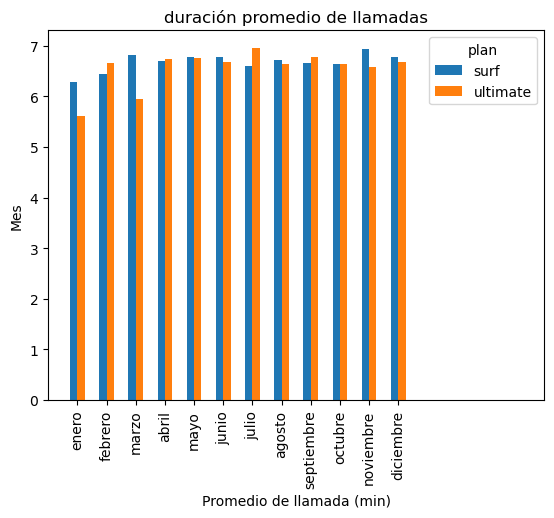

In [34]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

#agruar toda la informacion entre plan, mes y llamadas_por_mes
grp = all_data.groupby(['plan','mes','llamadas_por_mes'])

#agregamos funcion de promedio a los minuos_por_mes y llamadas_por_mes
agg_dict = {'minutos_por_mes': 'mean','llamadas_por_mes':'mean'}
promedio_llamadas = grp.agg(agg_dict)


#aplicamos un funcion 'cal_promedio' a los datos agrupados y lo guardamos en una nueva columna
promedio_llamadas['promedio'] = promedio_llamadas.apply(cal_promedio,axis=1)


#creamo la grafica mostrando el valor por mes de cada plan
df_pivot = promedio_llamadas.pivot_table(index='mes',columns='plan',values='promedio')
df_pivot.index = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']
df_pivot.plot(kind='bar') 

plt.title('duración promedio de llamadas')
plt.xlabel('Promedio de llamada (min)')
plt.ylabel('Mes')
plt.xlim(-1,16)
plt.show()

> **Comentario:** Se muestra un grafico de dispersion de los minutos por mes y plan que usan los usuario

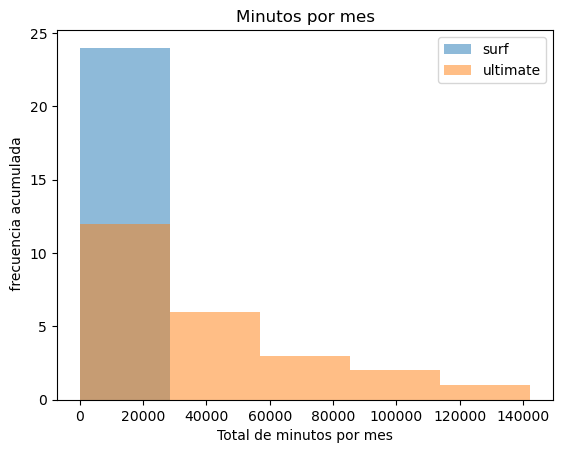

In [35]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

minutos_mensuales = all_data.groupby(['mes','plan_name'])['minutos_por_mes'].sum().reset_index()

minutos_mensuales.plot(kind='hist',bins=5, alpha=0.5)
plt.title('Minutos por mes')
plt.xlabel('Total de minutos por mes')
plt.ylabel(' frecuencia acumulada')
plt.legend(['surf','ultimate'])
plt.show()

<!--[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.] -->

> **Comentario:** a traves de la media y la varianza podemos identificar valores como:
> 1. El promedio de llamas por okay y por mes
> 2. La dispersion de los datos con respecto a la media de los datos, por play mes.

In [36]:
# Calcula la media y la varianza de la duración mensual de llamadas.

media = promedio_llamadas.groupby(['plan','mes'])['promedio'].mean()
varianza = promedio_llamadas.groupby(['plan','mes'])['promedio'].var()

print(f"Media:{media}")
print()
print(f"varianza:{varianza}")

Media:plan      mes 
surf      1.0     6.287143
          2.0     6.449806
          3.0     6.816463
          4.0     6.706185
          5.0     6.780018
          6.0     6.777469
          7.0     6.594167
          8.0     6.728246
          9.0     6.662708
          10.0    6.632638
          11.0    6.929172
          12.0    6.787771
ultimate  1.0     5.623106
          2.0     6.665898
          3.0     5.948486
          4.0     6.745242
          5.0     6.750188
          6.0     6.689736
          7.0     6.958108
          8.0     6.641360
          9.0     6.775069
          10.0    6.645226
          11.0    6.585899
          12.0    6.676434
Name: promedio, dtype: float64

varianza:plan      mes 
surf      1.0     0.248009
          2.0     1.868950
          3.0     1.534280
          4.0     0.863879
          5.0     1.110802
          6.0     0.754169
          7.0     0.714746
          8.0     1.138493
          9.0     0.868582
          10.0    0.954703
     

> **Comentario:** Se realiza un diagrama de caja en el cual podemos visualizar la distibucion por mes de la duracion de llamdas por mes y plan


<Axes: title={'center': 'promedio'}, xlabel='[plan, mes]'>

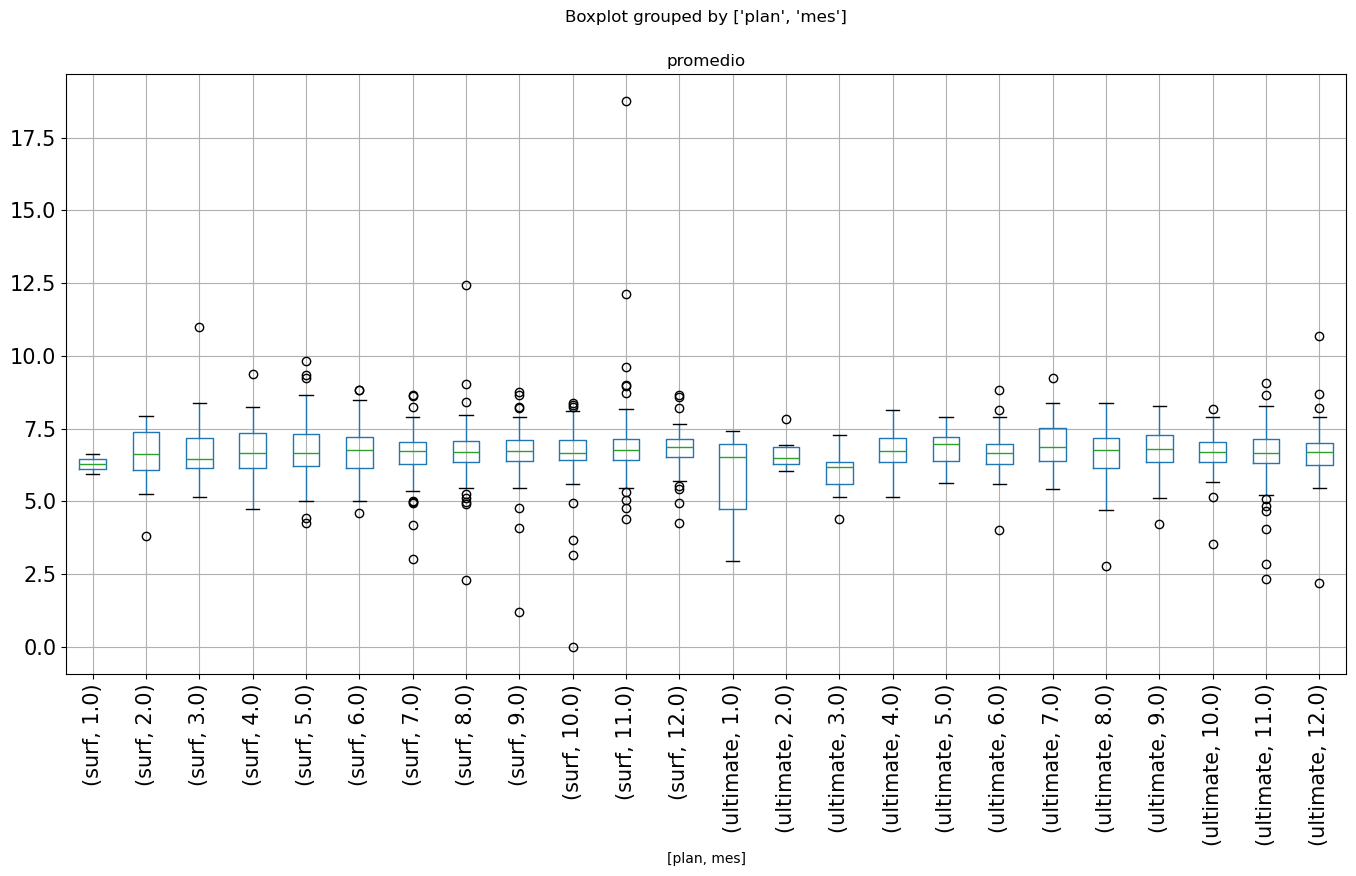

In [37]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

promedio_llamadas.boxplot(
    column=['promedio'],
    by=['plan','mes'],
    rot=90,
    fontsize=15,
    figsize=(16,8)
)

<!--[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]-->
Los usuarios del plan surf duran mas en promedio de tiempo de llamada a comparacion de los usuarios del plan ultimate

### Mensajes

(0.0, 13000.0)

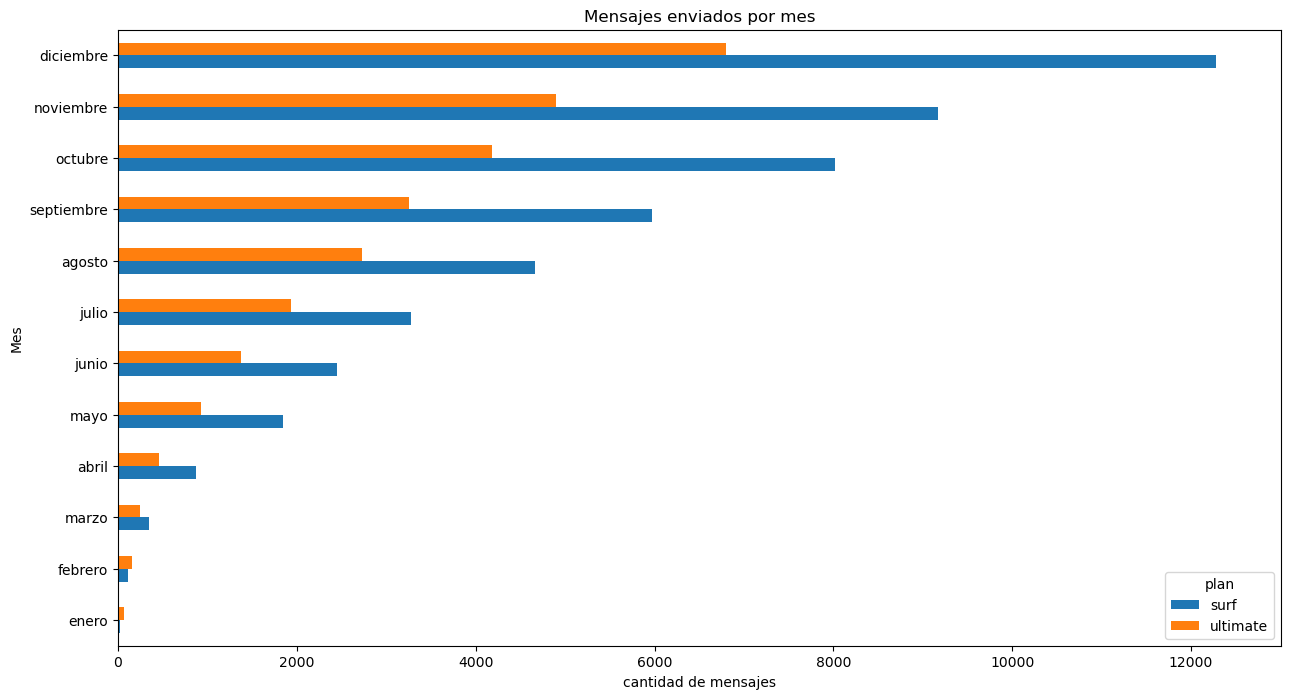

In [38]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

data_mensajes = all_data.groupby(['mes','plan'])['mensajes_por_mes'].sum().reset_index()

#creamo la grafica mostrando el valor por mes de cada plan
df_pivot = data_mensajes.pivot_table(index='mes',columns='plan',values='mensajes_por_mes')
df_pivot.index = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']
df_pivot.plot(kind='barh',figsize=(15, 8)) 

plt.title('Mensajes enviados por mes')
plt.xlabel('cantidad de mensajes')
plt.ylabel('Mes')
plt.xlim(0,13000)
 

<!--[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]-->

Los usuarios del plan surf mandan mas mensajes que los usuarios de ultimate, y conforme pasan los meses, lo usuario del plan surf aumentan el uso de mensajes.

### Internet

In [39]:
display(all_data)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,...,usd_per_gb,usd_per_message,usd_per_minute,plan_name,mes,llamadas_por_mes,minutos_por_mes,mensajes_por_mes,internet_por_mes,ingreso_mensual
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,1000,30720,...,7,0.01,0.01,ultimate,12.0,16.0,116.83,11.0,1901.47,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,8.0,27.0,171.14,30.0,6919.15,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,9.0,49.0,297.69,44.0,13314.82,20.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,10.0,65.0,374.11,53.0,22330.49,90.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,50,15360,...,10,0.03,0.03,surf,11.0,64.0,404.59,36.0,18504.30,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,0,50,15360,...,10,0.03,0.03,surf,12.0,39.0,324.77,NaN,23137.69,NaN
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,0,50,15360,...,10,0.03,0.03,surf,9.0,41.0,330.37,NaN,12984.76,NaN
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,0,50,15360,...,10,0.03,0.03,surf,10.0,53.0,363.28,NaN,19492.43,NaN
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,0,50,15360,...,10,0.03,0.03,surf,11.0,45.0,288.56,NaN,16813.83,NaN


(0.0, 5000000.0)

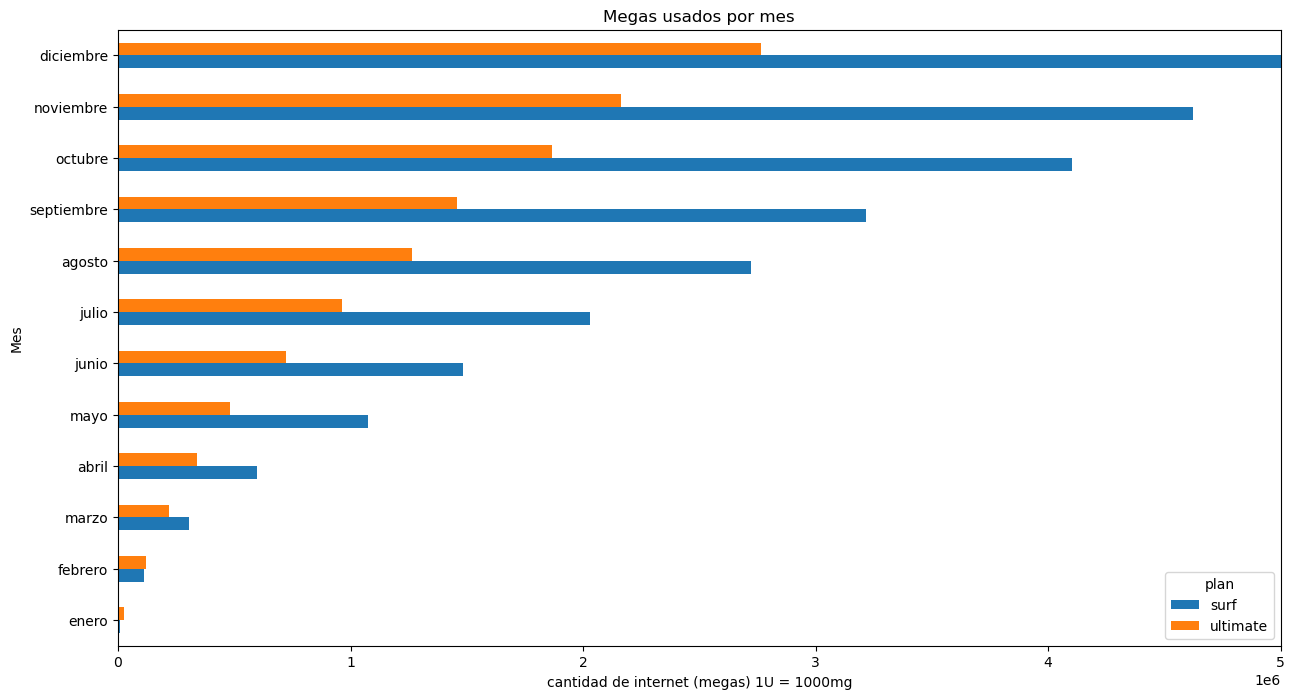

In [40]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

data_internet = all_data.groupby(['mes','plan'])['internet_por_mes'].sum().reset_index()

#creamo la grafica mostrando el valor por mes de cada plan
df_pivot = data_internet.pivot_table(index='mes',columns='plan',values='internet_por_mes')
df_pivot.index = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']
df_pivot.plot(kind='barh',figsize=(15, 8)) 

plt.title('Megas usados por mes')
plt.xlabel('cantidad de internet (megas) 1U = 1000mg')
plt.ylabel('Mes')
plt.xlim(0,5000000)

<!--[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]-->

Los usuarios del plan surf usan mas internet que los usuarios del plan ultimate, conforme pasan los meses el uso del internet delos usuarios del plan surf, se asemeja a un aumento tipo exponencial

## Ingreso

<!--[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]-->

> **Comentario:** Se calcula y grafica la cantidad de ingresos mensuales por mes:

(0.0, 20000.0)

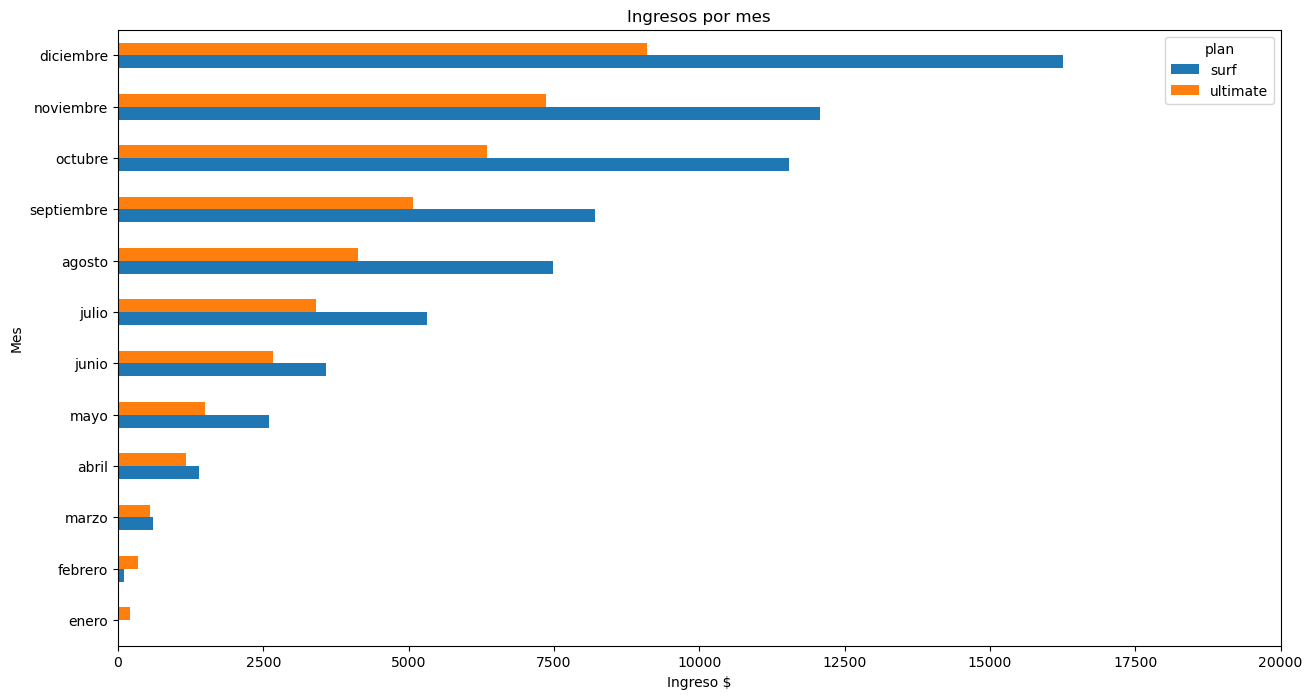

In [41]:


# Compara la cantidad de ingresos por mes y plan
data_inresos = all_data.groupby(['mes','plan'])['ingreso_mensual'].sum().reset_index()

#creamo la grafica mostrando el valor por mes de cada plan
df_pivot = data_inresos.pivot_table(index='mes',columns='plan',values='ingreso_mensual')
df_pivot.index = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']
df_pivot.plot(kind='barh',figsize=(15, 8)) 

plt.title('Ingresos por mes')
plt.xlabel('Ingreso $')
plt.ylabel('Mes')
plt.xlim(0,20000)

<!--[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]-->

dado los resultados del grafico, podemos observar un ingreso mayor por parte del plan 'surf' con respecto al plan 'ultimate' ademas de que conforme pasan los meses el ingreso del plan 'surf' va tanto en aumento que al final de año practicamente duplica a los ingresos de 

## Prueba las hipótesis estadísticas

<!-- [Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.] -->
<!--[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]-->
> **Comentario:** Se elabora una hipotsis nula y una hipotesis alternativa:

In [42]:
# Prueba las hipótesis

#hipotesis nula
H0 = 'los ingresos promedio de los planes Ultimate y Surf son diferentes.'

#hipotesis alternativa
H1 = 'los ingresos promedio de los planes Ultimate y Surf no son diferentes.'

#se realiza un filtrado para el plan 'surf'
data_surf =  all_data[all_data['plan']== 'surf']['ingreso_mensual'].dropna()
#se realiza un filtrado para el plan 'ultimate'
data_ultimate =  all_data[all_data['plan']== 'ultimate']['ingreso_mensual'].dropna()

#Determinar el valor de alpha
alpha = 0.05

In [43]:
#Establecemos la prubea estadistica para la comparacion de conjuntsde datos
results = st.ttest_ind(data_surf,data_ultimate)

print('valor p:',results.pvalue)

#verificamos con la condicion el valor de p contra el valor de alpha
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
    print(H0)
else:
    print("No podemos rechazar la hipótesis nula")
    print(H1)


valor p: 1.063718184652907e-10
Rechazamos la hipótesis nula
los ingresos promedio de los planes Ultimate y Surf son diferentes.


<!--[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]-->
<!--[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]-->

> **Comentario:** Se elabora una hipotsis nula y una hipotesis alternativa:

In [44]:
# Prueba las hipótesis

#hipotesis nula
H0 = 'los ingresos promedio de los planes NY-NJ y otras regiones son diferentes.'

#hipotesis alternativa
H1 = 'los ingresos promedio de los planes NY-NJ y otras regiones no son diferentes.'


#conjunto de valores de 'NY-NJ'
NY_NJ = df_megaline_users[df_megaline_users['city'].str.contains("NY-NJ", case=False)]

#conjunto de valores que no son 'NY-NJ'
otros = df_megaline_users[df_megaline_users['city'] != df_megaline_users['city'].str.contains("NY-NJ", case=False)]

#se realiza un merge con los datos que contienden ingresos mensuales
data_NY_NJ =  NY_NJ.merge(all_data,how='left' , left_on='user_id', right_on='user_id')
data_otros =  otros.merge(all_data,how='left' , left_on='user_id', right_on='user_id')


#Eiliminamos vales ausentes en ambos conjuntos de datos
data_NY_NJ =  all_data['ingreso_mensual'].dropna()
data_otros =  all_data['ingreso_mensual'].dropna()

#Determinar el valor de alpha
alpha = 0.05

In [45]:
#Establecemos la prubea estadistica para la comparacion de conjuntsde datos
results = st.ttest_ind(data_surf,data_ultimate)

print('valor p:',results.pvalue)

#verificamos con la condicion el valor de p contra el valor de alpha 
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
    print(H0)
else:
    print("No podemos rechazar la hipótesis nula")
    print(H1)

valor p: 1.063718184652907e-10
Rechazamos la hipótesis nula
los ingresos promedio de los planes NY-NJ y otras regiones son diferentes.


## Conclusión general

<!--[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]-->

Como Conslusion general, al analizar los datos de 1 año de la telefonica, consta de 2 tipos de planes para sus usuarios 'surf' y 'ultimate', considerando que el por ultimate, es el servicio con mas prestaciones y por ender tambein es el mas caro.

Al analizar las tablas de consumos o servicios que incluyen los planes, p. ej. numero de llamadas realizadas, promedio de duracion de llamadas, mensajes e internet por mes; Se percibe de una menera uniforme en todos los servicios, que la demanda por parte del usuario del plan 'surf', utiliza más el servicio que los usuarios del plan 'ultimate', de tal manera que los usuarios del plan 'surf' terminan pagando más al mes, que los usuarios del plan 'ultimate', en consecuencia a esto, son los usuarios que se exceden de los servicios incuidos en el plan tarifario 'surf', los que generan los ingresos a la compañia telefonica, a medida que pasan los meses los usarios del plan 'surf' van incrementando el promedio de los ingresos en comparacion de los usuarios 'ultimate', que el incremente no va tan acelerado como los del plan 'surf'.

indiscutiblemte el servicio de internet es el mas usado por los usuarios de ambos planes, pero predomina significativamtne la demanda del servicio por parte de los usarios del plan 'surf'